In [1]:
import pandas as pd
import os
import re
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from time import time
import cv2
from zipfile import ZipFile
import scipy.io
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import time
import random
import numpy as np
from sklearn.model_selection import train_test_split
import threading
import shutil
import pandas as pd
import os
import math
import csv
from itertools import compress
import cv2
import time
import shutil
import scipy.io as sio
import os
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon
import random
import tensorflow as tf
from tqdm import tqdm
import multiprocessing
try:
    import queue
except ImportError:
    import Queue as queue

import glob

In [ ]:
!wget --header="Host: thor.robots.ox.ac.uk" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" --header="Referer: https://www.robots.ox.ac.uk/" --header="Cookie: _ga=GA1.3.447472098.1614888528; _gid=GA1.3.809493676.1617114537; _gat=1" --header="Connection: keep-alive" "https://thor.robots.ox.ac.uk/~vgg/data/scenetext/SynthText.zip" -c -O 'SynthText.zip'

--2021-04-11 05:36:30--  https://thor.robots.ox.ac.uk/~vgg/data/scenetext/SynthText.zip
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40717671794 (38G) [application/zip]
Saving to: ‘SynthText.zip’

SynthText.zip       100%[===================>]  37.92G  60.6MB/s    in 10m 57s 

2021-04-11 05:47:28 (59.1 MB/s) - ‘SynthText.zip’ saved [40717671794/40717671794]



In [ ]:
with ZipFile('/content/SynthText.zip', 'r') as zip:
    name=zip.namelist()

In [ ]:
file=[i for i in name if i.endswith('jpg')]

In [ ]:
files=random.sample(file,5000)
files[:6]

['SynthText/6/asphalt_21_1.jpg',
 'SynthText/175/swimming_72_28.jpg',
 'SynthText/69/hedge_104_102.jpg',
 'SynthText/65/flowers_17_64.jpg',
 'SynthText/46/cream_112_85.jpg',
 'SynthText/26/cambridge_47_79.jpg']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with ZipFile('/content/SynthText.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall(path='/content/drive/MyDrive/',members=files)

In [ ]:
gt_file=[i for i in name if i.endswith('.mat')]

In [ ]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/SynthText.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall(path='/content/drive/MyDrive/',members=gt_file)

In [ ]:
def get_images():
    '''This is a function we have used to get list of all images'''
    path =os.listdir('/content/drive/MyDrive/SynthText/')
    listFiles = []
    for i in path:
        listFiles.append(i)
    return listFiles

In [ ]:
files=os.listdir('/content/drive/MyDrive/SynthText/annotation/')
CLASSES=[]
for i in tqdm(files):
    file=open('/content/drive/MyDrive/SynthText/annotation/'+i,'r')
    for line in file:
        line=line.replace('\n','')
        a=line.split(",")[-1]
        if a!='':
            CLASSES.append(a)
NUM_CLASSES=len(list(set(CLASSES))) 

100%|██████████| 858750/858750 [18:50<00:00, 759.39it/s]


In [ ]:

dataset = sio.loadmat('/content/drive/MyDrive/SynthText/' + 'gt.mat')

In [ ]:
img_paths = [i[0] for i in dataset['imnames'][0, :]]

In [ ]:
with open('/content/drive/MyDrive/SynthText/path_to_imgs.txt', 'w') as f:
    for item in img_paths:
        f.write("%s\n" % item)

In [ ]:
dataset_word_list = []
for img_words in dataset['txt'][0, :]:
    img_word_list = []
    for words in img_words:
        for word in [item for sublist in [i.strip().split(' ') for i in words.split('\n')] for item in sublist]:
            if word != '':
                img_word_list.append(word)
    dataset_word_list.append(img_word_list)
    

In [ ]:
iter = 0
img_paths = [i[0] for i in dataset['imnames'][0, :]]
for polys, words, img_path in zip(dataset['wordBB'][0, :], dataset_word_list, img_paths):

    # fix poly
    if len(polys.shape) == 2:
        polys = polys[:, :, np.newaxis]
    polys = polys.transpose([-1, 0, 1])
    if polys.shape[0] != len(words):
        print('number of polys and words do not mathc')
        break

    # write file
    with open('/content/drive/MyDrive/SynthText/annotation/{}.txt'.format(img_path.split('/')[1].split('.')[0]), 'w') as f:
        for poly, word in zip(polys, words):
            line = np.around(poly, 1).ravel()
            line = np.concatenate([line, [word]], axis=0)
            for item in line:
                f.write("%s " % item)
            f.write("\n")

    iter += 1
    if iter % 100 == 0:
        print(iter, 'out of', len(img_paths))

Streaming output truncated to the last 5000 lines.
358800 out of 858750
358900 out of 858750
359000 out of 858750
359100 out of 858750
359200 out of 858750
359300 out of 858750
359400 out of 858750
359500 out of 858750
359600 out of 858750
359700 out of 858750
359800 out of 858750
359900 out of 858750
360000 out of 858750
360100 out of 858750
360200 out of 858750
360300 out of 858750
360400 out of 858750
360500 out of 858750
360600 out of 858750
360700 out of 858750
360800 out of 858750
360900 out of 858750
361000 out of 858750
361100 out of 858750
361200 out of 858750
361300 out of 858750
361400 out of 858750
361500 out of 858750
361600 out of 858750
361700 out of 858750
361800 out of 858750
361900 out of 858750
362000 out of 858750
362100 out of 858750
362200 out of 858750
362300 out of 858750
362400 out of 858750
362500 out of 858750
362600 out of 858750
362700 out of 858750
362800 out of 858750
362900 out of 858750
363000 out of 858750
363100 out of 858750
363200 out of 858750
3633

In [2]:
def get_images():
    files = []
    for ext in ['jpg', 'png', 'jpeg']:
        files.extend(glob.glob(
            os.path.join('/content/drive/MyDrive/SynthText/', '*.{}'.format(ext))))
    return files

In [3]:
def load_annotation(p):
    '''
    load polygon coordinate and text from the text file for corresponding image
    here p is name of image file whose cooresponding annotation we want 
    '''
    text_polys = []
    text_tags = []
    labels = []
    
    p=p.split('/')[-1]
    print(p)
    p=p.replace('jpg','txt')
    p=p.replace('png','txt')
    p=p.replace('jpeg','txt')
    p='/content/drive/MyDrive/SynthText/annotation/'+p
    print(p)
    
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32)
    with open(p, 'r', encoding='utf-8-sig') as f:
        for line in f.readlines():
            line = line.replace('\xef\xbb\bf', '')
            line = line.replace('\xe2\x80\x8d', '')
            line = line.strip()
            line = line.split(' ')
            if len(line) > 9:
                label = line[8]
                for i in range(len(line) - 9):
                    label = label + "," + line[i + 9]
            else:
                label = line[-1]
            line = [line[0]] + [line[4]] + [line[1]] + [line[5]] + [line[2]] + [line[6]] + [line[3]] + [line[7]]
            temp_line = map(eval, line[:8])
            x1, y1, x2, y2, x3, y3, x4, y4 = map(float, temp_line)
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            if label == '*' or label == '###' or label == '':
                text_tags.append(None)
            else:
                text_tags.append(label)
          
        return np.array(text_polys, dtype=np.float32), np.array(text_tags)

In [4]:
def polygon_area(poly):
    '''
    compute area of a polygon
    '''
    edge = [
        (poly[1][0] - poly[0][0]) * (poly[1][1] + poly[0][1]),
        (poly[2][0] - poly[1][0]) * (poly[2][1] + poly[1][1]),
        (poly[3][0] - poly[2][0]) * (poly[3][1] + poly[2][1]),
        (poly[0][0] - poly[3][0]) * (poly[0][1] + poly[3][1])
    ]
    return np.sum(edge)/2.

In [5]:

def check_and_validate_polys(polys, tags, xxx_todo_changeme):


    def is_polygon(poly):
        for i in range(3):
            p0 = poly[i]

        p1 = poly[(i + 1) % 4]
        p2 = poly[(i + 2) % 4]
    
        if p0[0] == p1[0] and p1[1] == p0[1]:
            return False
        if p0[0] == p2[0] and p2[1] == p0[1]:
            return False
        if p1[0] == p2[0] and p1[1] == p2[1]:
            return False
    
        if p0[0] == p1[0]:
            if p1[0] == p2[0]:
                return False
        else:
            if p1[0] != p2[0]:
                k1 = (p1[1] - p0[1]) / (p1[0] - p0[0])
                k2 = (p2[1] - p1[1]) / (p2[0] - p1[0])
                if abs(k1 - k2) < 1e-6:
                    return False
                else:
                    if p1[1] == p2[1]:
                        return False
        
        return True

    (h, w) = xxx_todo_changeme
    if polys.shape[0] == 0:
        return polys
    polys[:, :, 0] = np.clip(polys[:, :, 0], 0, w - 1)
    polys[:, :, 1] = np.clip(polys[:, :, 1], 0, h - 1)

    validated_polys = []
    validated_tags = []
    for poly, tag in zip(polys, tags):
        p_area = polygon_area(poly)

        if is_polygon(poly) is False:
            continue

        if abs(p_area) < 1:
            continue
        if p_area > 0:
            poly = poly[(0, 3, 2, 1), :]
        validated_polys.append(poly)
        validated_tags.append(tag)
    return np.array(validated_polys), np.array(validated_tags)    
    

In [6]:
def shrink_poly(poly, r):
    '''
    fit a poly inside the origin poly
    used for generate the score map
    '''
    # shrink ratio
    R = 0.3
    # find the longer pair
    if np.linalg.norm(poly[0] - poly[1]) + np.linalg.norm(poly[2] - poly[3]) > \
                    np.linalg.norm(poly[0] - poly[3]) + np.linalg.norm(poly[1] - poly[2]):
        # first move (p0, p1), (p2, p3), then (p0, p3), (p1, p2)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
        ## p0, p3
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
    else:
        ## p0, p3
        # print poly
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
    return poly


In [7]:
def point_dist_to_line(p1, p2, p3):
    '''compute the distance from p3 to p1-p2'''
    return np.linalg.norm(np.cross(p2 - p1, p1 - p3)) / np.linalg.norm(p2 - p1)

#Find equation of line using two 2D points p1 and p2
def fit_line(p1, p2):
    '''fit a line ax+by+c = 0'''
    if p1[0] == p1[1]:
        return [1., 0., -p1[0]]
    else:
        [k, b] = np.polyfit(p1, p2, deg=1)
        return [k, -1., b]

#Find Intersection poitn of 2 lines
def line_cross_point(line1, line2):
    '''line1 0= ax+by+c, compute the cross point of line1 and line2'''
    if line1[0] != 0 and line1[0] == line2[0]:
        print('Cross point does not exist')
        return None
    if line1[0] == 0 and line2[0] == 0:
        print('Cross point does not exist')
        return None
    if line1[1] == 0:
        x = -line1[2]
        y = line2[0] * x + line2[2]
    elif line2[1] == 0:
        x = -line2[2]
        y = line1[0] * x + line1[2]
    else:
        k1, _, b1 = line1
        k2, _, b2 = line2
        x = -(b1-b2)/(k1-k2)
        y = k1*x + b1
    return np.array([x, y], dtype=np.float32)

#Get Equation of line that is perpendicular to line passing through a point
def line_verticle(line, point):
    '''get the verticle line from line across point'''
    if line[1] == 0:
        verticle = [0, -1, point[1]]
    else:
        if line[0] == 0:
            verticle = [1, 0, -point[0]]
        else:
            verticle = [-1./line[0], -1, point[1] - (-1/line[0] * point[0])]
    return verticle

In [8]:
def rectangle_from_parallelogram(poly):
    '''
    fit a rectangle from a parallelogram
    '''
    p0, p1, p2, p3 = poly
    angle_p0 = np.arccos(np.dot(p1-p0, p3-p0)/(np.linalg.norm(p0-p1) * np.linalg.norm(p3-p0)))
    if angle_p0 < 0.5 * np.pi:
        if np.linalg.norm(p0 - p1) > np.linalg.norm(p0-p3):
            # p0 and p2
            ## p0
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p0)

            new_p3 = line_cross_point(p2p3, p2p3_verticle)
            ## p2
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p2)

            new_p1 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
        else:
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p0)

            new_p1 = line_cross_point(p1p2, p1p2_verticle)
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p2)

            new_p3 = line_cross_point(p0p3, p0p3_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
    else:
        if np.linalg.norm(p0-p1) > np.linalg.norm(p0-p3):
            # p1 and p3
            ## p1
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p1)

            new_p2 = line_cross_point(p2p3, p2p3_verticle)
            ## p3
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p3)

            new_p0 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)
        else:
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p1)

            new_p0 = line_cross_point(p0p3, p0p3_verticle)
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p3)

            new_p2 = line_cross_point(p1p2, p1p2_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)

#Sorting a rectangle to get all point in clockwies manner
def sort_rectangle(poly):
    '''sort the four coordinates of the polygon, points in poly should be sorted clockwise'''
    # First find the lowest point
    p_lowest = np.argmax(poly[:, 1])
    if np.count_nonzero(poly[:, 1] == poly[p_lowest, 1]) == 2:
        # if the bottom line is parallel to x-axis, then p0 must be the upper-left corner
        p0_index = np.argmin(np.sum(poly, axis=1))
        p1_index = (p0_index + 1) % 4
        p2_index = (p0_index + 2) % 4
        p3_index = (p0_index + 3) % 4
        return poly[[p0_index, p1_index, p2_index, p3_index]], 0.
    else:
        # find the point that sits right to the lowest point
        p_lowest_right = (p_lowest - 1) % 4
        p_lowest_left = (p_lowest + 1) % 4
        angle = np.arctan(-(poly[p_lowest][1] - poly[p_lowest_right][1])/(poly[p_lowest][0] - poly[p_lowest_right][0]))
        # assert angle > 0
        if angle <= 0:
            print(angle, poly[p_lowest], poly[p_lowest_right])
        if angle/np.pi * 180 > 45:
            #this point is p2
            p2_index = p_lowest
            p1_index = (p2_index - 1) % 4
            p0_index = (p2_index - 2) % 4
            p3_index = (p2_index + 1) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], -(np.pi/2 - angle)
        else:
            # this point is p3
            p3_index = p_lowest
            p0_index = (p3_index + 1) % 4
            p1_index = (p3_index + 2) % 4
            p2_index = (p3_index + 3) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], angle


def restore_rectangle_rbox(origin, geometry):
    ''' Resotre rectangle tbox'''
    d = geometry[:, :4]
    angle = geometry[:, 4]
    # for angle > 0
    origin_0 = origin[angle >= 0]
    d_0 = d[angle >= 0]
    angle_0 = angle[angle >= 0]
    if origin_0.shape[0] > 0:
        p = np.array([np.zeros(d_0.shape[0]), -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], np.zeros(d_0.shape[0]),
                      np.zeros(d_0.shape[0]), np.zeros(d_0.shape[0]),
                      d_0[:, 3], -d_0[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(angle_0), np.sin(angle_0)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([-np.sin(angle_0), np.cos(angle_0)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_0 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_0 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_0 = np.zeros((0, 4, 2))
    # for angle < 0
    origin_1 = origin[angle < 0]
    d_1 = d[angle < 0]
    angle_1 = angle[angle < 0]
    if origin_1.shape[0] > 0:
        p = np.array([-d_1[:, 1] - d_1[:, 3], -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), np.zeros(d_1.shape[0]),
                      -d_1[:, 1] - d_1[:, 3], np.zeros(d_1.shape[0]),
                      -d_1[:, 1], -d_1[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(-angle_1), -np.sin(-angle_1)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([np.sin(-angle_1), np.cos(-angle_1)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_1 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_1 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_1 = np.zeros((0, 4, 2))
    return np.concatenate([new_p_0, new_p_1])


#Some geometrical functions used in codes
def restore_rectangle(origin, geometry):
    return restore_rectangle_rbox(origin, geometry)

def getRotateRect(box):
    rect = cv2.minAreaRect(box)

    angle=rect[2]  # angle = [-90, 0)
    if angle < -45:
        rect = (rect[0], (rect[1][0], rect[1][1]), rect[2])
        angle += 90
        size = (rect[1][1],rect[1][0])
    else:
        rect = (rect[0], (rect[1][0], rect[1][1]), rect[2])
        size=rect[1]

    box_ = cv2.boxPoints(rect)
    return np.concatenate([rect[0], size]), angle, box_


#These Functions are used to Generate ROI params like out box,crop box & angles that we use to crop text from image
def generate_roiRotatePara(box, angle, expand_w = 60):
    '''Generate all ROI Parameterts'''
    p0_rect, p1_rect, p2_rect, p3_rect = box
    cxy = (p0_rect + p2_rect) / 2.
    size = np.array([np.linalg.norm(p0_rect - p1_rect), np.linalg.norm(p0_rect - p3_rect)])
    rrect = np.concatenate([cxy, size])

    box=np.array(box)

    points=np.array(box, dtype=np.int32)
    xmin=np.min(points[:,0])
    xmax=np.max(points[:,0])
    ymin=np.min(points[:,1])
    ymax=np.max(points[:,1])
    bbox = np.array([xmin, ymin, xmax, ymax])
    if np.any(bbox < -expand_w):
        return None
    
    rrect[:2] -= bbox[:2]
    rrect[:2] -= rrect[2:] / 2
    rrect[2:] += rrect[:2]

    bbox[2:] -= bbox[:2]

    rrect[::2] = np.clip(rrect[::2], 0, bbox[2])
    rrect[1::2] = np.clip(rrect[1::2], 0, bbox[3])
    rrect[2:] -= rrect[:2]
    
    return bbox.astype(np.int32), rrect.astype(np.int32), - angle

def restore_roiRotatePara(box):
    rectange, rotate_angle = sort_rectangle(box)
    return generate_roiRotatePara(rectange, rotate_angle)

#This function is used to generate geo_map,score_map, training_mask,corp_box,out_box,angle that we use while training model
def generate_rbox(im_size, polys, tags):
    '''Genrate score_map and geo_map for image'''
    h, w = im_size
    poly_mask = np.zeros((h, w), dtype=np.uint8)
    score_map = np.zeros((h, w), dtype=np.uint8)
    geo_map = np.zeros((h, w, 5), dtype=np.float32)

    outBoxs = []
    cropBoxs = []
    angles = []
    text_tags = []
    recg_masks = []
    # mask used during traning, to ignore some hard areas
    training_mask = np.ones((h, w), dtype=np.uint8)
    for poly_idx, poly_tag in enumerate(zip(polys, tags)):
        poly = poly_tag[0]
        #print(poly)
        tag = poly_tag[1]
        #print(tag)
        r = [None, None, None, None]
        for i in range(4):
            r[i] = min(np.linalg.norm(poly[i] - poly[(i + 1) % 4]),
                       np.linalg.norm(poly[i] - poly[(i - 1) % 4]))
        # score map
        shrinked_poly = shrink_poly(poly.copy(), r).astype(np.int32)[np.newaxis, :, :]
        cv2.fillPoly(score_map, shrinked_poly, 1)
        cv2.fillPoly(poly_mask, shrinked_poly, poly_idx + 1)

        # if geometry == 'RBOX':
        # generate a parallelogram for any combination of two vertices
        fitted_parallelograms = []
        for i in range(4):
            p0 = poly[i]
            p1 = poly[(i + 1) % 4]
            p2 = poly[(i + 2) % 4]
            p3 = poly[(i + 3) % 4]
            edge = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            backward_edge = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            forward_edge = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            if point_dist_to_line(p0, p1, p2) > point_dist_to_line(p0, p1, p3):
                #  parallel lines through p2
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p2[0]]
                else:
                    edge_opposite = [edge[0], -1, p2[1] - edge[0] * p2[0]]
            else:
                # after p3
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p3[0]]
                else:
                    edge_opposite = [edge[0], -1, p3[1] - edge[0] * p3[0]]
            # move forward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p2 = line_cross_point(forward_edge, edge_opposite)
            if point_dist_to_line(p1, new_p2, p0) > point_dist_to_line(p1, new_p2, p3):
                # across p0
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p0[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p0[1] - forward_edge[0] * p0[0]]
            else:
                # across p3
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p3[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p3[1] - forward_edge[0] * p3[0]]
            new_p0 = line_cross_point(forward_opposite, edge)
            new_p3 = line_cross_point(forward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
            # or move backward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p3 = line_cross_point(backward_edge, edge_opposite)
            if point_dist_to_line(p0, p3, p1) > point_dist_to_line(p0, p3, p2):
                # across p1
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p1[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p1[1] - backward_edge[0] * p1[0]]
            else:
                # across p2
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p2[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p2[1] - backward_edge[0] * p2[0]]
            new_p1 = line_cross_point(backward_opposite, edge)
            new_p2 = line_cross_point(backward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
        areas = [Polygon(t).area for t in fitted_parallelograms]
        parallelogram = np.array(fitted_parallelograms[np.argmin(areas)][:-1], dtype=np.float32)
        # sort thie polygon
        parallelogram_coord_sum = np.sum(parallelogram, axis=1)
        min_coord_idx = np.argmin(parallelogram_coord_sum)
        parallelogram = parallelogram[
            [min_coord_idx, (min_coord_idx + 1) % 4, (min_coord_idx + 2) % 4, (min_coord_idx + 3) % 4]]

        rectange = rectangle_from_parallelogram(parallelogram)
        rectange, rotate_angle = sort_rectangle(rectange)

        p0_rect, p1_rect, p2_rect, p3_rect = rectange

        # if the poly is too small, then ignore it during training
        poly_h = min(np.linalg.norm(p0_rect - p3_rect), np.linalg.norm(p1_rect - p2_rect))
        poly_w = min(np.linalg.norm(p0_rect - p1_rect), np.linalg.norm(p2_rect - p3_rect))

        invaild = (min(poly_h, poly_w) < 6) or tag is None or (True and poly_h > poly_w * 2)

        if invaild:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)
        xy_in_poly = np.argwhere(poly_mask == (poly_idx + 1))
        
        if not invaild:
            roiRotatePara = generate_roiRotatePara(rectange, rotate_angle)
            if roiRotatePara:
                outBox, cropBox, angle = roiRotatePara
                if min(cropBox[2:]) > 6:
                    w , h = cropBox[2:]
                    textImgW = np.ceil(min(w / float(h) * 32, 256) / 4 /1)
                    #print(tag)
                    if textImgW >= 2 * min(len(tag), 16):  # avoid CTC error
                        outBoxs.append(outBox)
                        cropBoxs.append(cropBox)
                        angles.append(angle)
                        text_tags.append(tag[:16])
                        recg_masks.append(1.)

        for y, x in xy_in_poly:
            point = np.array([x, y], dtype=np.float32)
            # top
            geo_map[y, x, 0] = point_dist_to_line(p0_rect, p1_rect, point) + 3
            # right
            geo_map[y, x, 1] = point_dist_to_line(p1_rect, p2_rect, point) + 3
            # down
            geo_map[y, x, 2] = point_dist_to_line(p2_rect, p3_rect, point) + 3
            # left
            geo_map[y, x, 3] = point_dist_to_line(p3_rect, p0_rect, point) + 3
            # angle
            geo_map[y, x, 4] = rotate_angle
    if len(outBoxs) == 0:
        outBoxs.append([0, 0, 2 * 4, 2 * 4]) # keep extract From sharedConv feature map not zero
        cropBoxs.append([0, 0, 2 * 4, 2 * 4])
        angles.append(0.)
        text_tags.append([NUM_CLASSES - 2])
        recg_masks.append(0.)

    outBoxs = np.array(outBoxs, np.int32)
    cropBoxs = np.array(cropBoxs, np.int32)
    angles = np.array(angles, np.float32)

    return score_map, geo_map, training_mask, (outBoxs, cropBoxs, angles), text_tags, recg_masks
    

In [ ]:
#Generator Function used to train Detection Branch in our Model
def generator(input_size=512, batch_size=32):
    image_list=[]
    for root, directories, files in os.walk('/content/drive/MyDrive/SynthText/'):
        for filename in files:
            # join the two strings in order to form the full filepath.
            if not filename.endswith('.txt'):
                filepath = os.path.join(root, filename)
                image_list.append(filepath)

    index = np.arange(0, len(image_list))
    while True:
        np.random.shuffle(index)
        images = []
        image_fns = []
        score_maps = []
        geo_maps = []
        training_masks = []
        rboxes = []
        tags = []
        recg_masks = []
        for i in index:
            try:
                im_fn = image_list[i]
                
                im = cv2.imread(im_fn,cv2.IMREAD_UNCHANGED)
                
                # print im_fn
                h, w, _ = im.shape
                #print(h,w)
                text_polys, text_tags = load_annotation(im_fn)
                text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))
                
                
                #resize the image to input size
                new_h, new_w, _ = im.shape
                resize_h = input_size
                resize_w = input_size
                im = cv2.resize(im, dsize=(512, 512),interpolation = cv2.INTER_AREA)

                
                resize_ratio_3_x = resize_w/float(new_w)
                resize_ratio_3_y = resize_h/float(new_h)
                text_polys[:, :, 0] *= resize_ratio_3_x
                text_polys[:, :, 1] *= resize_ratio_3_y
                new_h, new_w, _ = im.shape
                score_map, geo_map, training_mask, rbox, text_tags, recg_mask = generate_rbox((new_h, new_w), text_polys, text_tags)

                

                images.append(im)
                image_fns.append(im_fn)
                score_maps.append(score_map[::, ::, np.newaxis].astype(np.float32))
                geo_maps.append(geo_map[::, ::, :].astype(np.float32))
                training_masks.append(training_mask[::, ::, np.newaxis].astype(np.float32))
                
                
                
                rboxes.append(rbox)
                tags.append(text_tags)
                recg_masks.append(recg_mask)

                if len(images) == batch_size:
                    yield (np.array(images),np.concatenate([np.array(score_maps), np.array(geo_maps), np.array(training_masks)],axis=3))
                    images = []
                    image_fns = []
                    score_maps = []
                    geo_maps = []
                    training_masks = []
                    rboxes = []
                    tags = []
                    recg_masks = []
            except Exception as e:
                print(image_list[i])
                import traceback
                traceback.print_exc()
                continue

In [48]:
class Deconv(tf.keras.layers.Layer):
  def __init__(self,name="deconv"):
    super().__init__(name)
    self.inp_size=0
    self.conv=None
    self.upsample=None
    self.bn=None
  def build(self,imshape):
    self.inp_size=imshape
    self.bn=tf.keras.layers.BatchNormalization()
    self.conv=tf.keras.layers.Conv2D(filters=self.inp_size[-1]//2,kernel_size=3,padding='same',activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12),use_bias=False)
    self.upsample=tf.keras.layers.UpSampling2D(size=(2,2),interpolation='bilinear',data_format='channels_last',)
  def call(self,X):
    
    x1=self.upsample(X)
    x1=self.conv(x1)
    x1=self.bn(x1)
    x1=tf.keras.activations.relu(x1)
    return x1

In [49]:
resnet=tf.keras.applications.ResNet50(input_shape=(512,512,3),include_top=False,weights='imagenet')
tf.keras.backend.clear_session()
layers=resnet.layers
x1,x2,x3,x4=None,None,None,None
for i in range(len(layers)): 
  x=layers[i]
  if x.name=='pool1_pool':
    x1=x
  if x.name=='conv3_block1_1_conv':
    x2=x
  if x.name=='conv4_block1_1_conv':
    x3=x   
  if x.name=='conv5_block3_2_conv':
    x4=x  
  #  input_1 ,conv1_relu
d=x4.output
d=Deconv('deconv1')(d)
d=tf.keras.layers.add([d,x3.output])

d=Deconv('deconv2')(d)
d=tf.keras.layers.add([d,x2.output])

d=Deconv('deconv3')(d)
d=tf.keras.layers.add([d,x1.output])
d=tf.keras.layers.BatchNormalization()(d)
d=Deconv('deconv4')(d)
d=Deconv('deconv5')(d)
score=tf.keras.layers.Conv2D(1,kernel_size=3,padding='same',activation='sigmoid')(d)

# Used this beacause sigmoid gives values in range of 0-1(as mentioned in git repository)
geo_map=tf.keras.layers.Conv2D(4,kernel_size=3,padding='same',activation='sigmoid')(d)*512
#Angles are assumed to be between [-45 to 45]
angle_map=(tf.keras.layers.Conv2D(1,kernel_size=3,padding='same',activation='sigmoid')(d)-0.5)*np.pi/2
out=tf.concat([score,geo_map,angle_map],axis=3)
detector=tf.keras.Model(resnet.input,out,name='detector')

for layers in resnet.layers:
  layers.trainable=False

94773248/94765736 [==============================] - 1s 0us/step


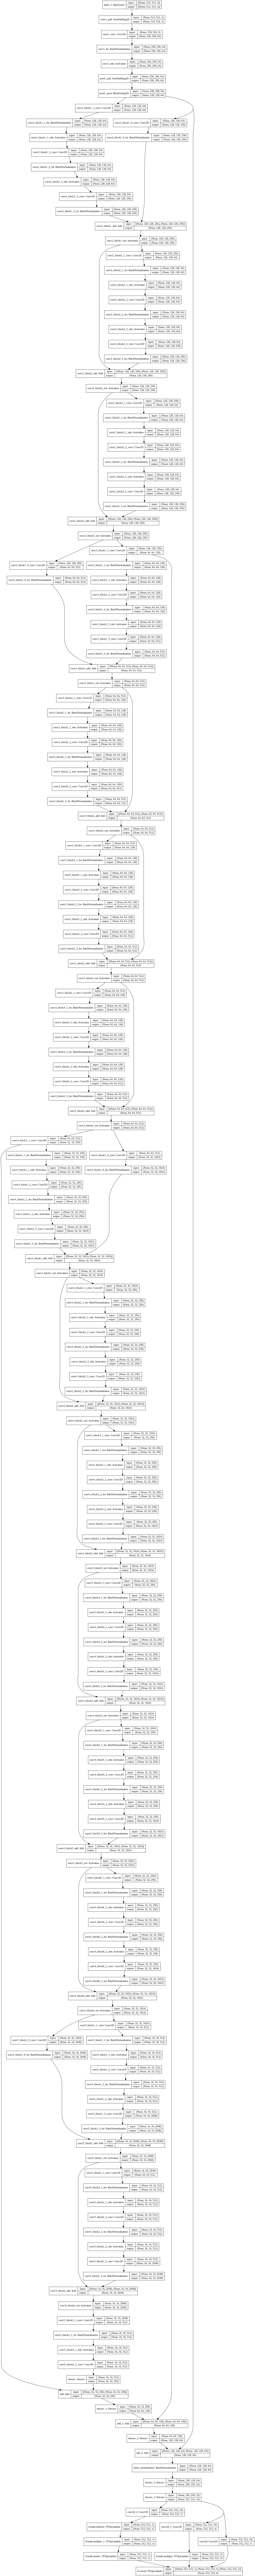

In [50]:
tf.keras.utils.plot_model(detector,show_shapes=True)

In [51]:
detector.summary()

Model: "detector"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
def dice_coefficient(y_true_cls, y_pred_cls,
                     training_mask):
    '''
    dice loss
    :param y_true_cls:
    :param y_pred_cls:
    :param training_mask:x
    :return:
    '''
    eps = 10**-6
    intersection = tf.reduce_sum(y_true_cls * y_pred_cls * training_mask)
    
    union = tf.reduce_sum(y_true_cls * training_mask) + tf.reduce_sum(y_pred_cls * training_mask) + eps
    loss = 1. - (2 * intersection / union)
    return loss

In [ ]:
class DetectorLoss(tf.keras.losses.Loss):
  def __init__(self, from_logits=False,reduction=tf.keras.losses.Reduction.AUTO,name='Detection_Loss_layer'):
      super(DetectorLoss, self).__init__(reduction=reduction, name=name)
  def call(self, y_true, y_pred):
    
    #Getting geo_map and score_maps
    y_true_cls=y_true[:,:,:,0]
    y_pred_cls=y_pred[:,:,:,0]
    y_pred_geo=y_pred[:,:,:,1:6]
    y_true_geo=y_true[:,:,:,1:6]
    training_mask=y_true[:,:,:,6]
    
    #1. Dice Loss
    classification_loss = dice_coefficient(y_true_cls, y_pred_cls, training_mask)
    # we scale classification loss by factor of 0.01 to match the iou loss part
    classification_loss *=0.01
    
    #2. IOU LOSS
    d1_gt, d2_gt, d3_gt, d4_gt, theta_gt = tf.split(value=y_true_geo, num_or_size_splits=5, axis=3)
    d1_pred, d2_pred, d3_pred, d4_pred, theta_pred = tf.split(value=y_pred_geo, num_or_size_splits=5, axis=3)
    area_gt = (d1_gt + d3_gt) * (d2_gt + d4_gt)
    area_pred = (d1_pred + d3_pred) * (d2_pred + d4_pred)
    
    w_union = tf.minimum(d2_gt, d2_pred) + tf.minimum(d4_gt, d4_pred)
    h_union = tf.minimum(d1_gt, d1_pred) + tf.minimum(d3_gt, d3_pred)
    area_intersect = w_union * h_union
    area_union = area_gt + area_pred - area_intersect
    
    
    L_AABB = -tf.math.log((area_intersect + 1.0)/(area_union + 1.0))
    L_theta = 1 - tf.cos(theta_pred - theta_gt)

    L_g = L_AABB +  50*L_theta
    L_g=tf.squeeze(L_g,axis=3)
    
    #Here I have multiplied final sum of loss with 100  so that it is easy to visulatise while trianing
    return 100*(tf.reduce_mean(L_g * y_true_cls * training_mask) + classification_loss)

In [ ]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='detection',write_images=True,histogram_freq=1)
roplateau=tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.90,patience=2,mode='min')
early=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5,mode='min',verbose=1)
modelchk=tf.keras.callbacks.ModelCheckpoint('detector_best.h5',save_best_only=True,mode='min',monitor='loss')

In [ ]:
detector.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,amsgrad=True),loss=DetectorLoss())

In [ ]:
detector.fit(generator(batch_size=10),steps_per_epoch=100,epochs= 10,callbacks=[tensorboard,roplateau,modelchk,early])

Epoch 1/10
100/100 [==============================] - 3958s 40s/step - loss: 11.0506
Epoch 2/10
100/100 [==============================] - 4000s 40s/step - loss: 6.3462
Epoch 3/10
 65/100 [==================>...........] - ETA: 22:50 - loss: 4.8446/content/drive/MyDrive/SynthText/gt.mat


Traceback (most recent call last):
  File "<ipython-input-18-a1edf214569b>", line 29, in generator
    h, w, _ = im.shape
AttributeError: 'NoneType' object has no attribute 'shape'


100/100 [==============================] - 3903s 39s/step - loss: 4.8881
Epoch 4/10
100/100 [==============================] - 3906s 39s/step - loss: 4.2629
Epoch 5/10
 39/100 [==========>...................] - ETA: 40:19 - loss: 3.8570/content/drive/MyDrive/SynthText/188/._village_67_21.jpg


Traceback (most recent call last):
  File "<ipython-input-18-a1edf214569b>", line 29, in generator
    h, w, _ = im.shape
AttributeError: 'NoneType' object has no attribute 'shape'


100/100 [==============================] - 3921s 39s/step - loss: 4.0457
Epoch 6/10
 28/100 [=======>......................] - ETA: 46:35 - loss: 4.2300/content/drive/MyDrive/SynthText/gt.mat


Traceback (most recent call last):
  File "<ipython-input-18-a1edf214569b>", line 29, in generator
    h, w, _ = im.shape
AttributeError: 'NoneType' object has no attribute 'shape'


100/100 [==============================] - 3876s 39s/step - loss: 4.0350
Epoch 7/10
100/100 [==============================] - 3923s 39s/step - loss: 4.1694
Epoch 8/10
  2/100 [..............................] - ETA: 1:09:13 - loss: 3.6830/content/drive/MyDrive/SynthText/188/._village_67_21.jpg


Traceback (most recent call last):
  File "<ipython-input-18-a1edf214569b>", line 29, in generator
    h, w, _ = im.shape
AttributeError: 'NoneType' object has no attribute 'shape'


100/100 [==============================] - 3889s 39s/step - loss: 3.9514
Epoch 9/10
 27/100 [=======>......................] - ETA: 47:04 - loss: 3.6599

In [ ]:
detector.load_weights('/content/detector.h5')

In [9]:
#These Are Function that will be used while converting geo_maps to score_maps and returns bounding boxes for image after nms

def sort_poly(p):
  min_axis = np.argmin(np.sum(p, axis=1))
  p = p[[min_axis, (min_axis+1)%4, (min_axis+2)%4, (min_axis+3)%4]]
  if abs(p[0, 0] - p[1, 0]) > abs(p[0, 1] - p[1, 1]):
    return p
  else:
    return p[[0, 3, 2, 1]]
def intersection(g, p):
    g = Polygon(g[:8].reshape((4, 2)))
    p = Polygon(p[:8].reshape((4, 2)))
    if not g.is_valid or not p.is_valid:
        return 0
    inter = Polygon(g).intersection(Polygon(p)).area
    union = g.area + p.area - inter
    if union == 0:
        return 0
    else:
        return inter/union


def weighted_merge(g, p):
    g[:8] = (g[8] * g[:8] + p[8] * p[:8])/(g[8] + p[8])
    g[8] = (g[8] + p[8])
    return g


def standard_nms(S, thres):
    order = np.argsort(S[:, 8])[::-1]
    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)
        ovr = np.array([intersection(S[i], S[t]) for t in order[1:]])

        inds = np.where(ovr <= thres)[0]
        order = order[inds+1]

    return S[keep]


def nms_locality(polys, thres=0.3):
    '''
    :param polys: a N*9 numpy array. first 8 coordinates, then prob
    :return: boxes after nms
    '''
    S = []
    p = None
  
    for g in polys:
        if p is not None and intersection(g, p) > thres:
        
            p = weighted_merge(g, p)
        else:
            if p is not None:
                S.append(p)
            p = g
  
    if p is not None:
        S.append(p)

    if len(S) == 0:
        return np.array([])
    
    return standard_nms(np.array(S), thres)

In [ ]:
# Inference pipeline function used for generating predicted bounding boxes on image for text detection
def inferencePipeline(img):
  
  start_time=time.time()
  
  #1.Text Detection
  img=cv2.resize(img,(512,512))
  ii=detector.predict(np.expand_dims(img,axis=0))
  score_map=ii[0][:,:,0]
  geo_map=ii[0][:,:,1:]
  print(score_map.shape)
  print(geo_map.shape)

  for ind in [0,1,2,3,4]:
    geo_map[:,:,ind]*=score_map

  #2.ROI Rotate  
  score_map_thresh=0.5
  box_thresh=0.1 
  nms_thres=0.2
  if len(score_map.shape) == 4:
    score_map = score_map[0, :, :, 0]
    geo_map = geo_map[0, :, :, :]

  # filter the score map
  xy_text = np.argwhere(score_map > score_map_thresh)

  # sort the text boxes via the y axis
  xy_text = xy_text[np.argsort(xy_text[:, 0])]

  # restore
  text_box_restored = restore_rectangle(xy_text[:, ::-1], geo_map[xy_text[:, 0], xy_text[:, 1], :]) # N*4*2
  boxes = np.zeros((text_box_restored.shape[0], 9), dtype=np.float32)
  boxes[:, :8] = text_box_restored.reshape((-1, 8))
  boxes[:, 8] = score_map[xy_text[:, 0], xy_text[:, 1]]
  print(boxes.shape)
  boxes = nms_locality(boxes.astype(np.float64), nms_thres)

  
  # here we filter some low score boxes by the average score map, this is different from the orginal paper
  for i, box in enumerate(boxes):
    mask = np.zeros_like(score_map, dtype=np.uint8)
    cv2.fillPoly(mask, box[:8].reshape((-1, 4, 2)).astype(np.int32), 1)
    boxes[i, 8] = cv2.mean(score_map, mask)[0]
  
    if i==4:
      break
  if len(boxes)>0:
    boxes = boxes[boxes[:, 8] > box_thresh]
  boxes[:,:8:2] = np.clip(boxes[:,:8:2], 0, 512 - 1)
  boxes[:,1:8:2] = np.clip(boxes[:,1:8:2], 0, 512 - 1)  
  res = []
  result = []
  if len(boxes)>0:

    for box in boxes:
      box_ =  box[:8].reshape((4, 2))
      if np.linalg.norm(box_[0] - box_[1]) < 8 or np.linalg.norm(box_[3]-box_[0]) < 8:
        continue
      result.append(box_)
  res.append(np.array(result, np.float32))   

  box_index = []
  brotateParas = []
  filter_bsharedFeatures = []
  for i in range(len(res)):
    rotateParas = []
    rboxes=res[i]
    txt=[]
    for j, rbox in enumerate(rboxes):
      para = restore_roiRotatePara(rbox)
      if para and min(para[1][2:]) > 8:
        rotateParas.append(para)
        box_index.append((i, j))
    pts=[]   
    
    
    #3. Text Recognition (From boxes given by Text Detection+ROI Rotate) 
    
  if len(rotateParas) > 0:
      
      for num in range(len(rotateParas)):
        text=""
        out=rotateParas[num][0]
        crop=rotateParas[num][1]
        points=np.array([[out[0],out[1]],[out[0]+out[2],out[1]],[out[0]+out[2],out[1]+out[3]],[out[0],out[1]+out[3]]])
        pts.append(points)
    
    # 4. Labeling detected and Recognized Text in Image
    
  for i in range(len(pts)):
      cv2.polylines(img,[pts[i]],isClosed=True,color=(0,255,0),thickness=1)
  end_time=time.time()
  print("Time Taken By Pipeline="+str(end_time-start_time)+" seconds") 
  return img    


(512, 512)
(512, 512, 5)
(5743, 9)
Time Taken By Pipeline=2.7648439407348633 seconds


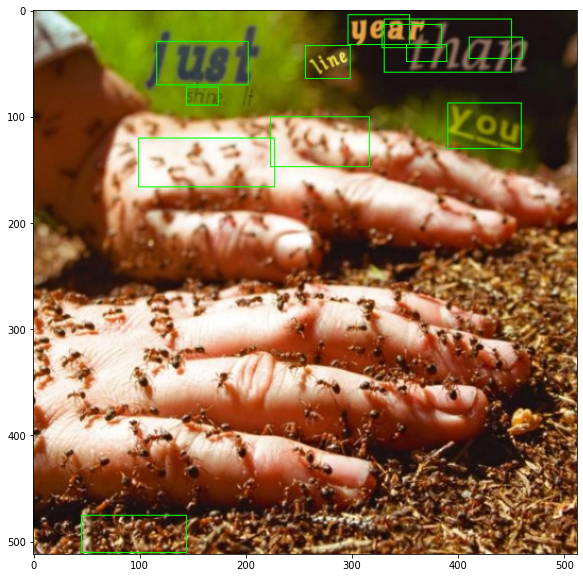

In [ ]:
a=os.listdir('/content/drive/MyDrive/SynthText/1')
path='/content/drive/MyDrive/SynthText/1/'+a[0]
img=cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im=inferencePipeline(img)
plt.figure(figsize=(10,10))
plt.imshow(im)

## Tuning on icdar dataset

In [10]:
!wget https://rrc.cvc.uab.es/downloads/ch4_training_images.zip

--2021-05-04 09:23:40--  https://rrc.cvc.uab.es/downloads/ch4_training_images.zip
Resolving rrc.cvc.uab.es (rrc.cvc.uab.es)... 158.109.8.55
Connecting to rrc.cvc.uab.es (rrc.cvc.uab.es)|158.109.8.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90667586 (86M) [application/zip]
Saving to: ‘ch4_training_images.zip’

ch4_training_images 100%[===================>]  86.47M  7.85MB/s    in 11s     

2021-05-04 09:23:51 (7.79 MB/s) - ‘ch4_training_images.zip’ saved [90667586/90667586]



In [11]:
!wget https://rrc.cvc.uab.es/downloads/ch4_training_localization_transcription_gt.zip

--2021-05-04 09:24:33--  https://rrc.cvc.uab.es/downloads/ch4_training_localization_transcription_gt.zip
Resolving rrc.cvc.uab.es (rrc.cvc.uab.es)... 158.109.8.55
Connecting to rrc.cvc.uab.es (rrc.cvc.uab.es)|158.109.8.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344624 (337K) [application/zip]
Saving to: ‘ch4_training_localization_transcription_gt.zip’

ch4_training_locali 100%[===================>] 336.55K   664KB/s    in 0.5s    

2021-05-04 09:24:34 (664 KB/s) - ‘ch4_training_localization_transcription_gt.zip’ saved [344624/344624]



In [52]:
detector.load_weights('/content/detector_icdar10.h5')

In [12]:
!mkdir -p icdar2015

In [13]:
!mkdir -p icdar2015/train_imgs/
!mkdir -p icdar2015/train_gt/
!unzip -qq ch4_training_images.zip -d icdar2015/train_imgs/
!unzip -qq ch4_training_localization_transcription_gt.zip -d icdar2015/train_gt

###Preparing data for icdar

In [14]:
l=os.listdir('icdar2015/train_gt')
CLASSES=[]
for i in tqdm(l):
    file=open('icdar2015/train_gt/'+i,'r')
    for line in file:
        line=line.replace('\n','')
        a=line.split(",")[-1]
        if a!='':
            CLASSES.append(a)
NUM_CLASSES=len(list(set(CLASSES)))

100%|██████████| 1000/1000 [00:00<00:00, 17160.16it/s]


In [15]:
def get_images():
    '''This is a function we have used to get list of all images'''
    path =os.listdir('icdar2015/train_imgs/')
    listFiles = []
    for i in path:
        listFiles.append(i)
    return listFiles

In [16]:
def load_annoataion(p):
    '''
    load polygon coordinate and text from the text file for corresponding image
    here p is name of image file whose cooresponding annotation we want 
    '''
    p=p.split('/')[2]
    p=p.replace('jpg','txt')
    p=p.replace('png','txt')
    p=p.replace('jpeg','txt')
    p='icdar2015/train_gt/gt_'+p
    text_polys = []
    text_tags = []
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32), np.array(text_tags, dtype=np.int32)
    with open(p, 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            label = line[-1].replace(' ','')
            line = [i.strip('\ufeff').strip('\xef\xbb\xbf') for i in line]

            x1, y1, x2, y2, x3, y3, x4, y4 = list(map(float, line[:8]))
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            
            if label == '###':
                text_tags.append(None)
            else:
                text_tags.append(label)

        return np.array(text_polys, dtype=np.float32), text_tags

In [ ]:
def generator(input_size=512, batch_size=32):
    '''Generator Function used fo training the model'''
    image_list = np.array(get_images())
    anno_path = 'icdar2015/train_imgs/'
    #print('anno path {}'.format(anno_path))
    image_list = np.array([anno_path+im_fn for im_fn in image_list if os.path.exists(anno_path+im_fn)])
    index = np.arange(0, image_list.shape[0])
    while True:
        np.random.shuffle(index)
        images = []
        image_fns = []
        score_maps = []
        geo_maps = []
        training_masks = []
        rboxes = []
        tags = []
        recg_masks = []
        for i in index:
            try:
                if image_list[i]=='icdar2015/train_imgs/img_141.jpg':
                  continue
                im_fn = image_list[i]
                #print("image path",im_fn)
                
                im = cv2.imread(im_fn,cv2.IMREAD_UNCHANGED)
                
                h, w, _ = im.shape
                #print(h,w)
                txt_fn = im_fn
                if not os.path.exists(txt_fn):
                    print('text file {} does not exists'.format(txt_fn))
                    continue
                text_polys, text_tags = load_annoataion(txt_fn)
                
                text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))

                
                
                #resize the image to input size
                new_h, new_w, _ = im.shape
                resize_h = input_size
                resize_w = input_size
                im = cv2.resize(im, dsize=(512, 512),interpolation = cv2.INTER_AREA)

                
                resize_ratio_3_x = resize_w/float(new_w)
                resize_ratio_3_y = resize_h/float(new_h)
                text_polys[:, :, 0] *= resize_ratio_3_x
                text_polys[:, :, 1] *= resize_ratio_3_y
                new_h, new_w, _ = im.shape
                score_map, geo_map, training_mask, rbox, text_tags, recg_mask = generate_rbox((new_h, new_w), text_polys, text_tags)

                

                images.append(im)
                image_fns.append(im_fn)
                score_maps.append(score_map[::, ::, np.newaxis].astype(np.float32))
                geo_maps.append(geo_map[::, ::, :].astype(np.float32))
                training_masks.append(training_mask[::, ::, np.newaxis].astype(np.float32))
                
                
                
                rboxes.append(rbox)
                tags.append(text_tags)
                recg_masks.append(recg_mask)

                if len(images) == batch_size:
                    yield (np.array(images),np.concatenate([np.array(score_maps), np.array(geo_maps), np.array(training_masks)],axis=3))
                    images = []
                    image_fns = []
                    score_maps = []
                    geo_maps = []
                    training_masks = []
                    rboxes = []
                    tags = []
                    recg_masks = []
            except Exception as e:
                #print(image_list[i])
                import traceback
                traceback.print_exc()
                continue

In [ ]:
detector.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(detector.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in detector.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  186


In [ ]:
detector.summary()

Model: "detector"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
detector.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,amsgrad=True),loss=DetectorLoss())

In [ ]:
detector.fit(generator(batch_size=10),steps_per_epoch=100,epochs= 50,callbacks=[tensorboard,roplateau,modelchk,early])

Epoch 1/50
 62/100 [=================>............] - ETA: 2:42 - loss: 1.0623

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in float_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


100/100 [==============================] - 466s 4s/step - loss: 1.0179
Epoch 2/50
100/100 [==============================] - 422s 4s/step - loss: 0.8129
Epoch 3/50
100/100 [==============================] - 430s 4s/step - loss: 0.7254
Epoch 4/50
100/100 [==============================] - 427s 4s/step - loss: 0.7380
Epoch 5/50
100/100 [==============================] - 425s 4s/step - loss: 0.6783
Epoch 6/50
100/100 [==============================] - 429s 4s/step - loss: 0.6356
Epoch 7/50
100/100 [==============================] - 432s 4s/step - loss: 0.6082
Epoch 8/50
100/100 [==============================] - 421s 4s/step - loss: 0.6505
Epoch 9/50
100/100 [==============================] - 430s 4s/step - loss: 0.6297
Epoch 10/50
100/100 [==============================] - 425s 4s/step - loss: 0.6024
Epoch 11/50
100/100 [==============================] - 434s 4s/step - loss: 0.6012
Epoch 12/50
100/100 [==============================] - 429s 4s/step - loss: 0.5579
Epoch 13/50
100/100 [===

In [ ]:
# Save the weights
detector.save_weights('/content/detector_icdar10.h5')

In [ ]:
detector.load_weights('/content/detector_icdar10.h5')

(512, 512)
(512, 512, 5)
(1354, 9)
Time Taken By Pipeline=0.3456606864929199 seconds


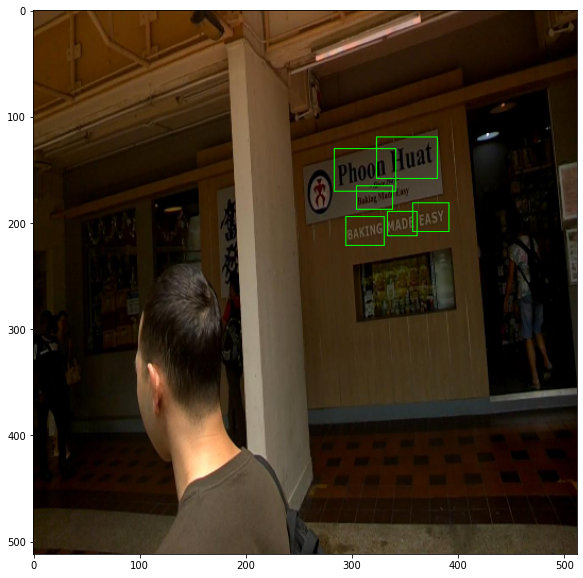

In [ ]:
a=os.listdir('/content/icdar2015/train_imgs/')
path='/content/icdar2015/train_imgs/'+a[10]
img=cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im=inferencePipeline(img)
plt.figure(figsize=(10,10))
plt.imshow(im)

## Text Recognition

In [17]:
!mkdir -p Words2

In [18]:

#This Function is used to prepare all images FRO icdar 2015 ORIGNAL Images
def text_image_generation(input_size=512,random_scale=np.array([0.5, 3.0]),vis=False):
    '''Genreating text Images From ICDAR 2015 dataset'''
    image_list = np.array(get_images())
    #print(image_list)
    anno_path = 'icdar2015/train_imgs/'
    image_list = np.array([anno_path+im_fn for im_fn in image_list if os.path.exists(anno_path+im_fn)])
    #print(image_list)
    
    index = np.arange(0, image_list.shape[0])
    np.random.shuffle(index)
    c=0
    paths=[]
    words=[]
    for i in index:
      try:
        if image_list[i]=='icdar2015/train_imgs/img_141.jpg':
          continue
        im_fn = image_list[i]
        im = cv2.imread(im_fn,cv2.IMREAD_UNCHANGED)
        h, w, _ = im.shape
        txt_fn = im_fn
        if not os.path.exists(txt_fn):
          print('text file {} does not exists'.format(txt_fn))
          continue
            
        text_polys, text_tags = load_annoataion(txt_fn)
        #print(text_polys)
        #print(text_tags)
        text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))

        
        new_h, new_w, _ = im.shape
        resize_h = new_h
        resize_w = new_w
       
        score_map, geo_map, training_mask, rbox, text_tags, recg_mask = generate_rbox((new_h, new_w), text_polys, text_tags)
          
        outbox, cropbox,angle=rbox
        for my in range(len(outbox)):
          if(recg_mask[my]!=0):
            out=outbox[my]
            crop=cropbox[my]
            if(im.shape[0]>out[3]+out[1] and im.shape[1]>out[2]+out[0] and out[2]>=0 and out[3]>=0 and out[1]>=0 and out[0]>=0):
              ang=angle[my]
              img1=tf.image.crop_to_bounding_box(im,out[1],out[0],out[3],out[2])
              img2=tf.keras.preprocessing.image.random_rotation(img1,ang*180/np.pi,)
              #img3=tf.image.crop_to_bounding_box(img2,crop[1],crop[0],crop[3],crop[2])
              if not isinstance(img2,np.ndarray):
                img2=img2.numpy()
              
              img3=cv2.resize(img2,(128,64),interpolation = cv2.INTER_AREA)
              img3=cv2.detailEnhance(img3)
              c+=1
              cv2.imwrite('/content/Words2/word_'+str(c)+'.png',img3)
              paths.append('/content/Words2/word_'+str(c)+'.png')
              words.append(text_tags[my])
              #print(c)         
      except Exception as e:
        print(image_list[i])
        import traceback
        traceback.print_exc()
        continue
    df=pd.DataFrame({"paths":paths,"words":words})
    df.to_csv('final.csv',index=False)

In [19]:
text_image_generation()

In [20]:
df_1=pd.read_csv('final.csv')

In [ ]:
def get_images():
    '''This is a function we have used to get list of all images'''
    path =os.listdir('/content/drive/MyDrive/SynthText/')
    listFiles = []
    for i in path:
        listFiles.append(i)
    return listFiles

In [ ]:
def load_annotation(p):
    '''
    load polygon coordinate and text from the text file for corresponding image
    here p is name of image file whose cooresponding annotation we want 
    '''
    text_polys = []
    text_tags = []
    labels = []
    
    p=p.split('/')[-1]
    print(p)
    p=p.replace('jpg','txt')
    p=p.replace('png','txt')
    p=p.replace('jpeg','txt')
    p='/content/drive/MyDrive/SynthText/annotation/'+p
    print(p)
    
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32)
    with open(p, 'r', encoding='utf-8-sig') as f:
        for line in f.readlines():
            line = line.replace('\xef\xbb\bf', '')
            line = line.replace('\xe2\x80\x8d', '')
            line = line.strip()
            line = line.split(' ')
            if len(line) > 9:
                label = line[8]
                for i in range(len(line) - 9):
                    label = label + "," + line[i + 9]
            else:
                label = line[-1]
            line = [line[0]] + [line[4]] + [line[1]] + [line[5]] + [line[2]] + [line[6]] + [line[3]] + [line[7]]
            temp_line = map(eval, line[:8])
            x1, y1, x2, y2, x3, y3, x4, y4 = map(float, temp_line)
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            if label == '*' or label == '###' or label == '':
                text_tags.append(None)
            else:
                text_tags.append(label)
          
        return np.array(text_polys, dtype=np.float32), np.array(text_tags)

In [ ]:
!mkdir -p Words4

In [ ]:

#This Function is used to prepare all images FRO icdar 2015 ORIGNAL Images
def text_image_generation_synth(input_size=512,random_scale=np.array([0.5, 3.0]),vis=False):
    '''Genreating text Images From ICDAR 2015 dataset'''
    image_list=[]
    for root, directories, files in os.walk('/content/drive/MyDrive/SynthText/'):
        for filename in files:
            # join the two strings in order to form the full filepath.
            if not filename.endswith('.txt'):
                filepath = os.path.join(root, filename)
                image_list.append(filepath)

    index = np.arange(0, len(image_list))
    np.random.shuffle(index)
    c=0
    paths=[]
    words=[]
    for i in index:
           
        im_fn = image_list[i]
        if im_fn !='/content/drive/MyDrive/SynthText/gt.mat':
          if '/._' not in im_fn:

                
            im = cv2.imread(im_fn,cv2.IMREAD_UNCHANGED)
                
            print(im_fn)
            h, w, _ = im.shape
            print(h,w)
            text_polys, text_tags = load_annotation(im_fn)
            text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))
                
                
                #resize the image to input size
            new_h, new_w, _ = im.shape
            resize_h = input_size
            resize_w = input_size
            im = cv2.resize(im, dsize=(512, 512),interpolation = cv2.INTER_AREA)

                
            resize_ratio_3_x = resize_w/float(new_w)
            resize_ratio_3_y = resize_h/float(new_h)
            text_polys[:, :, 0] *= resize_ratio_3_x
            text_polys[:, :, 1] *= resize_ratio_3_y
            new_h, new_w, _ = im.shape
            score_map, geo_map, training_mask, rbox, text_tags, recg_mask = generate_rbox((new_h, new_w), text_polys, text_tags)

          
            outbox, cropbox,angle=rbox
            for my in range(len(outbox)):
               if(recg_mask[my]!=0):
                   out=outbox[my]
                   crop=cropbox[my]
                   if(im.shape[0]>out[3]+out[1] and im.shape[1]>out[2]+out[0] and out[2]>=0 and out[3]>=0 and out[1]>=0 and out[0]>=0):
                         ang=angle[my]
                         img1=tf.image.crop_to_bounding_box(im,out[1],out[0],out[3],out[2])
                         img2=tf.keras.preprocessing.image.random_rotation(img1,ang*180/np.pi,)
                         #img3=tf.image.crop_to_bounding_box(img2,crop[1],crop[0],crop[3],crop[2])
                         if not isinstance(img2,np.ndarray):
                             img2=img2.numpy()
              
                         img3=cv2.resize(img2,(128,64),interpolation = cv2.INTER_AREA)
                         img3=cv2.detailEnhance(img3)
                         c+=1
                         print(img3)
                         cv2.imwrite('/content/Words4/word_'+str(c)+'.png',img3)
                         if os.path.exists('/content/Words4/word_'+str(c)+'.png'):
                           print('hi')
                         paths.append('content/Words4/word_'+str(c)+'.png')
                         words.append(text_tags[my])
              #print(c)         
      
    df=pd.DataFrame({"paths":paths,"words":words})
    df.to_csv('final_1.csv',index=False)

In [ ]:
text_image_generation_synth()

In [ ]:
df=pd.read_csv('final_1.csv')

In [30]:
train,test=train_test_split(df_1,test_size=0.1,random_state=113)

In [ ]:
train,test=train_test_split(df_1,test_size=0.1,random_state=113)
train1,test1=train_test_split(df,test_size=0.1,random_state=13)
train=pd.concat([train1,train])
test=pd.concat([test1,test])

In [45]:
CHAR_VECTOR = " 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZÉ´-~`<>'.:;^/|!?$%#@&*()[]{}_+=,\\\""
NUM_CLASSES = len(CHAR_VECTOR) 
char_index={}
index_char={}
for i,val in enumerate(CHAR_VECTOR):
  index_char[i+1]=val
  char_index[val]=i+1

In [43]:
def recognizer_generator_train(batch_size):
  '''Generator function for training in Text Recognition branch'''
  df=train
  while True:
    try:
      images=[]
      vectors=[]
      for ind in range(df.shape[0]):
        path='/'+df.iloc[ind]['paths']
        if os.path.exists(path):
            #path=df.iloc[ind]['paths']
            img=cv2.imread(path)
            #print(img)
            img=cv2.detailEnhance(img)
        
            img=cv2.resize(img, (128,64),cv2.INTER_NEAREST)
            b=str(df.iloc[ind]['words'])
            if len(b)==0:
                 continue
            images.append(img)
            vec=[]
            for i1 in b:
                 vec.append(char_index[i1])
            while(len(vec)<23):
                 vec.append(0)  
            vec=np.array(vec)
            vectors.append(vec)    
            if len(vectors) == batch_size:
                  yield (np.array(images),np.array(vectors))
                  images=[]
                  vectors=[]
        
    except Exception as e:
      import traceback
      traceback.print_exc()
      continue

In [32]:
def recognizer_generator_test(batch_size):
  '''Generator function for Cross validation while training in Text Recognition branch'''
  df=test
  while True:
    try:
      images=[]
      vectors=[]
      for ind in range(df.shape[0]):
        path='/'+df.iloc[ind]['paths']
        if os.path.exists(path):
            
            img=cv2.imread(path)
            img=cv2.resize(img,(128,64),cv2.INTER_NEAREST)
            img=cv2.detailEnhance(img)
            b=str(df.iloc[ind]['words'])
            if len(b)==0:
                continue
            images.append(img)
            vec=[]
            for i1 in b:
                 vec.append(char_index[i1])
            while(len(vec)<23):
                vec.append(0)  
            vec=np.array(vec)
            vectors.append(vec)    
            if len(vectors) == batch_size:
                 yield (np.array(images),np.array(vectors))
                 images=[]
                 vectors=[]
    except Exception as e:
      import traceback
      traceback.print_exc()
      continue

In [33]:
inputs = tf.keras.layers.Input(name='the_input', shape=(64,128,3), dtype='float32')  

inner = tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(inputs) 
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max1')(inner)  

inner = tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)  
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max2')(inner)  

inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)  
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(inner)  
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max3')(inner)  

inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(inner)  
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv6')(inner)   
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max4')(inner)  

inner = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', name='con7')(inner) 
inner = tf.keras.layers.BatchNormalization()(inner)
inner = tf.keras.layers.Activation('relu')(inner)
inner = tf.keras.layers.Reshape(target_shape=((64,512)), name='reshape')(inner)  
inner = tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner) 

out=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,go_backwards=True))(inner)
out=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128,return_sequences=True,go_backwards=True))(out)
x=tf.keras.layers.Dense(100)(out)#Here we hve given 100 bcz vocab size is 99 and 1 extra is for blank symbol
x=tf.keras.activations.softmax(x)
recognizer=tf.keras.models.Model(inputs,x)

In [22]:
recognizer.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          [(None, 64, 128, 3)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 128, 64)  1792        the_input[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 128, 64)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 128, 64)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [39]:
def ctc_loss(y_true,y_pred):
  #https://keras.io/examples/vision/captcha_ocr/
  #https://stackoverflow.com/questions/64321779/how-to-use-tf-ctc-loss-with-variable-length-features-and-labels
  label_length = tf.math.count_nonzero(y_true, axis=-1, keepdims=True)
  return tf.keras.backend.ctc_batch_cost(y_true,y_pred,np.ones((128,1),'int32')*64,label_length)

In [36]:
reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',patience=2,mode='min',factor=0.97,verbose=1)
early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,mode='min',verbose=1)
tnsbrd=tf.keras.callbacks.TensorBoard('recognizer',write_images=True,histogram_freq=1)  
save=tf.keras.callbacks.ModelCheckpoint('recognizer_best.h5',monitor='val_loss',mode='min')

In [40]:
recognizer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01
                                                 ,amsgrad=True),loss=ctc_loss)
reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',patience=2,mode='min',factor=0.97,verbose=1)
early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,mode='min',verbose=1)
tnsbrd=tf.keras.callbacks.TensorBoard('recognizer',write_images=True,histogram_freq=1)  
save=tf.keras.callbacks.ModelCheckpoint('recognizer_best.h5',monitor='val_loss',mode='min')

In [ ]:
recognizer.fit(recognizer_generator_train(batch_size=128),epochs=50,steps_per_epoch=train.shape[0]//128,\ 
           callbacks=[reduce,early,tnsbrd,save],validation_data=recognizer_generator_test(batch_size=128),validation_steps=test.shape[0]//128)

In [ ]:
recognizer.fit(recognizer_generator_train(batch_size=128),epochs=30,steps_per_epoch=train.shape[0]//128,\
           callbacks=[reduce,early,tnsbrd,save],validation_data=recognizer_generator_test(batch_size=128),validation_steps=test.shape[0]//128)

Epoch 1/30
29/29 [==============================] - 54s 517ms/step - loss: 64.9176 - val_loss: 22.0444
Epoch 2/30
29/29 [==============================] - 12s 431ms/step - loss: 21.7363 - val_loss: 24.3638
Epoch 3/30
29/29 [==============================] - 12s 431ms/step - loss: 21.4300 - val_loss: 24.3201
Epoch 4/30
29/29 [==============================] - 12s 435ms/step - loss: 21.2944 - val_loss: 22.5929
Epoch 5/30
29/29 [==============================] - 12s 432ms/step - loss: 21.1229 - val_loss: 21.3957
Epoch 6/30
29/29 [==============================] - 13s 437ms/step - loss: 20.9766 - val_loss: 21.4462
Epoch 7/30
29/29 [==============================] - 13s 438ms/step - loss: 20.8555 - val_loss: 21.2459
Epoch 8/30
29/29 [==============================] - 13s 439ms/step - loss: 20.6627 - val_loss: 20.6745
Epoch 9/30
29/29 [==============================] - 12s 432ms/step - loss: 20.4732 - val_loss: 21.0132
Epoch 10/30
29/29 [==============================] - 13s 437ms/step - los

In [ ]:
recognizer.fit(recognizer_generator_train(batch_size=128),epochs=100,steps_per_epoch=train.shape[0]//128,\
           callbacks=[reduce,early,tnsbrd,save],validation_data=recognizer_generator_test(batch_size=128),validation_steps=test.shape[0]//128)

Epoch 1/100
29/29 [==============================] - 13s 468ms/step - loss: 17.9402 - val_loss: 20.2103
Epoch 2/100
29/29 [==============================] - 13s 438ms/step - loss: 18.0279 - val_loss: 19.7955
Epoch 3/100
29/29 [==============================] - 12s 433ms/step - loss: 17.9746 - val_loss: 19.3838

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.009699999783188104.
Epoch 4/100
29/29 [==============================] - 13s 439ms/step - loss: 18.3504 - val_loss: 19.8741
Epoch 5/100
29/29 [==============================] - 12s 435ms/step - loss: 17.8660 - val_loss: 20.3351
Epoch 6/100
29/29 [==============================] - 12s 431ms/step - loss: 17.6965 - val_loss: 20.3753
Epoch 7/100
29/29 [==============================] - 12s 434ms/step - loss: 17.5328 - val_loss: 19.5777
Epoch 8/100
29/29 [==============================] - 13s 439ms/step - loss: 17.3306 - val_loss: 19.6799
Epoch 9/100
29/29 [==============================] - 12s 431ms/step - loss: 17.4966 - va

In [ ]:
recognizer.fit(recognizer_generator_train(batch_size=128),epochs=30,steps_per_epoch=train.shape[0]//128,\
           callbacks=[reduce,tnsbrd,save],validation_data=recognizer_generator_test(batch_size=128),validation_steps=test.shape[0]//128)

Epoch 1/30
29/29 [==============================] - 13s 472ms/step - loss: 16.8607 - val_loss: 19.5109
Epoch 2/30
29/29 [==============================] - 12s 434ms/step - loss: 16.1849 - val_loss: 19.6701
Epoch 3/30
29/29 [==============================] - 12s 427ms/step - loss: 15.9125 - val_loss: 20.6693
Epoch 4/30
29/29 [==============================] - 12s 428ms/step - loss: 15.8715 - val_loss: 20.1656
Epoch 5/30
29/29 [==============================] - 12s 431ms/step - loss: 15.9328 - val_loss: 20.4018
Epoch 6/30
29/29 [==============================] - 12s 433ms/step - loss: 16.0242 - val_loss: 20.7776

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00885292745195329.
Epoch 7/30
29/29 [==============================] - 12s 432ms/step - loss: 16.2805 - val_loss: 21.3604
Epoch 8/30
29/29 [==============================] - 12s 429ms/step - loss: 16.6616 - val_loss: 20.2260

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.008587339203804731.
Epoch 9/30
29/29 

In [ ]:
recognizer.save_weights('/content/recognizer_best_1.h5')

In [41]:
recognizer.load_weights('/content/recognizer_best_1.h5')


In [46]:
recognizer.fit(recognizer_generator_train(batch_size=128),epochs=30,steps_per_epoch=train.shape[0]//128,\
           callbacks=[reduce,tnsbrd,save],validation_data=recognizer_generator_test(batch_size=128),validation_steps=test.shape[0]//128)

Epoch 1/30
21/29 [====================>.........] - ETA: 1:06 - loss: 22.6407

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 258s 9s/step - loss: 22.0563 - val_loss: 20.6214
Epoch 2/30
14/29 [=============>................] - ETA: 2:01 - loss: 18.7198

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 244s 8s/step - loss: 18.4544 - val_loss: 20.6152
Epoch 3/30
 7/29 [======>.......................] - ETA: 3:01 - loss: 16.9023

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 245s 8s/step - loss: 17.0644 - val_loss: 19.4345
Epoch 4/30


Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


22/29 [=====================>........] - ETA: 56s - loss: 16.6141 

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 16.5540 - val_loss: 18.6292
Epoch 5/30
15/29 [==============>...............] - ETA: 1:53 - loss: 16.1010

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 15.9157 - val_loss: 19.3025
Epoch 6/30
 8/29 [=======>......................] - ETA: 2:51 - loss: 15.3353

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 15.1451 - val_loss: 18.9075
Epoch 7/30
 1/29 [>.............................] - ETA: 3:45 - loss: 15.4451

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


23/29 [======================>.......] - ETA: 48s - loss: 14.8606

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 14.8291 - val_loss: 19.8745
Epoch 8/30
16/29 [===============>..............] - ETA: 1:45 - loss: 14.9338

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 241s 8s/step - loss: 14.8287 - val_loss: 19.1482
Epoch 9/30
 9/29 [========>.....................] - ETA: 2:42 - loss: 14.5634

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 14.5056 - val_loss: 19.8505
Epoch 10/30
 2/29 [=>............................] - ETA: 3:36 - loss: 12.9747

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


24/29 [=======================>......] - ETA: 40s - loss: 13.4005

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 13.3857 - val_loss: 19.0967
Epoch 11/30
17/29 [================>.............] - ETA: 1:38 - loss: 13.1594

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 13.0671 - val_loss: 19.3477
Epoch 12/30
10/29 [=========>....................] - ETA: 2:34 - loss: 12.5609

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 12.7076 - val_loss: 20.0055
Epoch 13/30
 3/29 [==>...........................] - ETA: 3:30 - loss: 12.8478

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


25/29 [========================>.....] - ETA: 32s - loss: 13.0293

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 13.0226 - val_loss: 21.4298
Epoch 14/30
18/29 [=================>............] - ETA: 1:29 - loss: 12.7575

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 12.5858 - val_loss: 19.9022
Epoch 15/30
11/29 [==========>...................] - ETA: 2:25 - loss: 11.5878

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 241s 8s/step - loss: 11.5219 - val_loss: 20.2206
Epoch 16/30
 4/29 [===>..........................] - ETA: 3:22 - loss: 10.9947

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


26/29 [=========================>....] - ETA: 24s - loss: 11.1818

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 241s 8s/step - loss: 11.1758 - val_loss: 21.0953
Epoch 17/30
19/29 [==================>...........] - ETA: 1:20 - loss: 11.4759

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 241s 8s/step - loss: 11.4445 - val_loss: 21.2752
Epoch 18/30
12/29 [===========>..................] - ETA: 2:17 - loss: 10.9888

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 241s 8s/step - loss: 11.3525 - val_loss: 22.7500

Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.009699999783188104.
Epoch 19/30
 5/29 [====>.........................] - ETA: 3:14 - loss: 10.8808

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


27/29 [==========================>...] - ETA: 16s - loss: 11.4255

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 11.4466 - val_loss: 21.1450
Epoch 20/30
20/29 [===================>..........] - ETA: 1:12 - loss: 11.9088

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 11.9089 - val_loss: 20.4413

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.009408999374136329.
Epoch 21/30
13/29 [============>.................] - ETA: 2:09 - loss: 10.8299

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 241s 8s/step - loss: 10.6933 - val_loss: 23.0532
Epoch 22/30
 6/29 [=====>........................] - ETA: 3:05 - loss: 9.8987

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


28/29 [===========================>..] - ETA: 8s - loss: 10.0972 

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 10.1031 - val_loss: 22.6963
Epoch 23/30
21/29 [====================>.........] - ETA: 1:04 - loss: 10.5083

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 10.5255 - val_loss: 21.5215
Epoch 24/30
14/29 [=============>................] - ETA: 2:01 - loss: 11.1361

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 11.1091 - val_loss: 21.4190

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.009126729257404804.
Epoch 25/30
 7/29 [======>.......................] - ETA: 2:58 - loss: 9.4707

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 9.3480 - val_loss: 22.1798
Epoch 26/30


Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


22/29 [=====================>........] - ETA: 56s - loss: 8.7063 

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 242s 8s/step - loss: 8.6778 - val_loss: 22.4926
Epoch 27/30
15/29 [==============>...............] - ETA: 1:54 - loss: 8.7443

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 8.6810 - val_loss: 22.0411
Epoch 28/30
 8/29 [=======>......................] - ETA: 2:50 - loss: 8.3503

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 8.5956 - val_loss: 23.3564

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.00885292745195329.
Epoch 29/30
 1/29 [>.............................] - ETA: 3:47 - loss: 9.2405

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


23/29 [======================>.......] - ETA: 48s - loss: 8.7528

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 243s 8s/step - loss: 8.7146 - val_loss: 23.1605
Epoch 30/30
16/29 [===============>..............] - ETA: 1:46 - loss: 8.2714

Traceback (most recent call last):
  File "<ipython-input-43-a211e8a84819>", line 23, in recognizer_generator_train
    vec.append(char_index[i1])
KeyError: '\n'


29/29 [==============================] - 244s 8s/step - loss: 8.1982 - val_loss: 23.2856


In [61]:
recognizer.save_weights('/content/recognizer_best_1.h5')

In [57]:
def inferencePipeline(img):
  '''This function is main complete pipeline of our Model'''
  start_time=time.time()
  
  #1.Text Detection
  img=cv2.resize(img,(512,512))
  ii=detector.predict(np.expand_dims(img,axis=0))
  score_map=ii[0][:,:,0]
  geo_map=ii[0][:,:,1:]


  for ind in [0,1,2,3,4]:
    geo_map[:,:,ind]*=score_map


  #2.ROI Rotate  
  score_map_thresh=0.5
  box_thresh=0.1 
  nms_thres=0.2
  if len(score_map.shape) == 4:
    score_map = score_map[0, :, :, 0]
    geo_map = geo_map[0, :, :, :]
  # filter the score map
  xy_text = np.argwhere(score_map > score_map_thresh)
  # sort the text boxes via the y axis
  xy_text = xy_text[np.argsort(xy_text[:, 0])]
  # restore
  text_box_restored = restore_rectangle(xy_text[:, ::-1], geo_map[xy_text[:, 0], xy_text[:, 1], :]) # N*4*2
  boxes = np.zeros((text_box_restored.shape[0], 9), dtype=np.float32)
  boxes[:, :8] = text_box_restored.reshape((-1, 8))
  boxes[:, 8] = score_map[xy_text[:, 0], xy_text[:, 1]]
  boxes = nms_locality(boxes.astype(np.float64), nms_thres)
  # boxes = np.concatenate([boxes, _boxes], axis=0)

  # here we filter some low score boxes by the average score map, this is different from the orginal paper
  for i, box in enumerate(boxes):
    mask = np.zeros_like(score_map, dtype=np.uint8)
    cv2.fillPoly(mask, box[:8].reshape((-1, 4, 2)).astype(np.int32), 1)
    boxes[i, 8] = cv2.mean(score_map, mask)[0]
    if i==4:
      break
  if len(boxes)>0:
    boxes = boxes[boxes[:, 8] > box_thresh]
  boxes[:,:8:2] = np.clip(boxes[:,:8:2], 0, 512 - 1)
  boxes[:,1:8:2] = np.clip(boxes[:,1:8:2], 0, 512 - 1)  
  res = []
  result = []
  if len(boxes)>0:
    for box in boxes:
      box_ =  box[:8].reshape((4, 2))
      if np.linalg.norm(box_[0] - box_[1]) < 8 or np.linalg.norm(box_[3]-box_[0]) < 8:
        continue
      result.append(box_)
  res.append(np.array(result, np.float32))   

  box_index = []
  brotateParas = []
  filter_bsharedFeatures = []
  for i in range(len(res)):
    rotateParas = []
    rboxes=res[i]
    txt=[]
    for j, rbox in enumerate(rboxes):
      para = restore_roiRotatePara(rbox)
      if para and min(para[1][2:]) > 8:
        rotateParas.append(para)
        box_index.append((i, j))
    pts=[]   
    
    
    #3. Text Recognition (From boxes given by Text Detection+ROI Rotate) 
    
    if len(rotateParas) > 0:
      for num in range(len(rotateParas)):
        text=""
        out=rotateParas[num][0]
        crop=rotateParas[num][1]
        points=np.array([[out[0],out[1]],[out[0]+out[2],out[1]],[out[0]+out[2],out[1]+out[3]],[out[0],out[1]+out[3]]])
        angle=rotateParas[num][2] 
        img1=tf.image.crop_to_bounding_box(img,out[1],out[0],out[3],out[2])
        img2=tf.keras.preprocessing.image.random_rotation(img1,angle)
        img2=tf.image.crop_to_bounding_box(img2,crop[1],crop[0],crop[3],crop[2]).numpy()
        img2=cv2.resize(img2,(128,64))
        img2=cv2.detailEnhance(img2)
        ii=recognizer.predict(np.expand_dims(img2,axis=0))
        arr=tf.keras.backend.ctc_decode(ii,np.ones((1),'int8')*64,)
        for val in arr[0][0].numpy()[0]:
          if val==-1:
            break
          else:
            text+=index_char[val]
        txt.append(text)
        pts.append(points)
    
    # 4. Labeling detected and Recognized Text in Image
    
    for i in range(len(txt)):
      cv2.polylines(img,[pts[i]],isClosed=True,color=(255,255,0),thickness=2)
      cv2.putText(img,txt[i],(pts[i][0][0],pts[i][0][1]),cv2.FONT_HERSHEY_SIMPLEX,0.8, (0, 0, 255), 3)
    end_time=time.time()
    print("Time Taken By Pipeline="+str(end_time-start_time)+" seconds")  
    return img

Time Taken By Pipeline=4.569321393966675 seconds


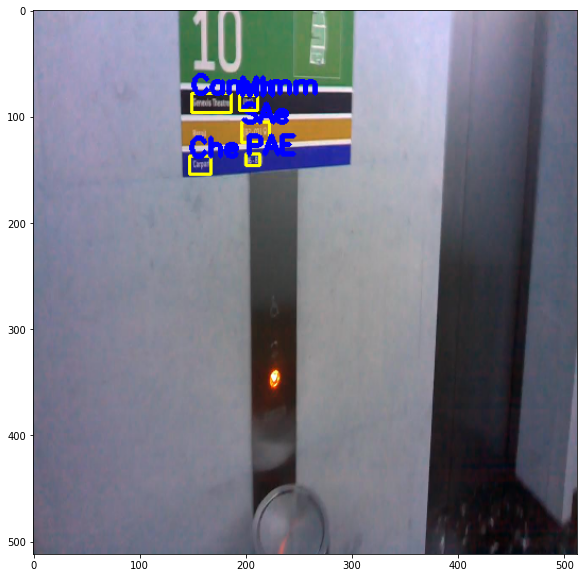

In [54]:
img=cv2.imread('/content/icdar2015/train_imgs/img_1.jpg')
im=inferencePipeline(img)
plt.figure(figsize=(20,10)) 
plt.imshow(im)

Time Taken By Pipeline=2.2508656978607178 seconds


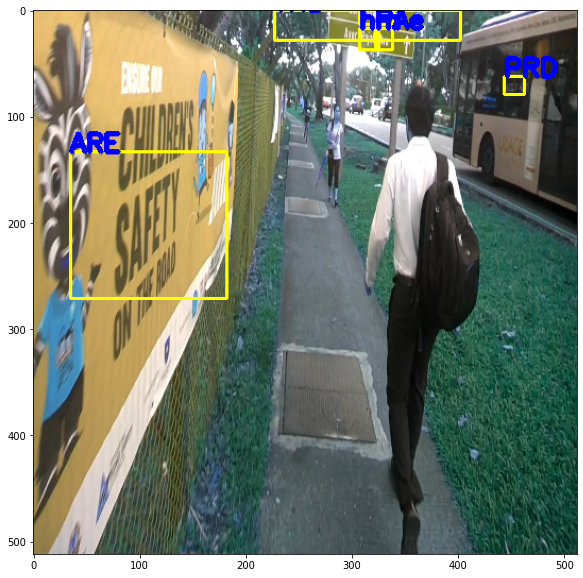

In [59]:
img=cv2.imread('/content/icdar2015/train_imgs/img_49.jpg')
im=inferencePipeline(img)
plt.figure(figsize=(20,10)) 
plt.imshow(im)

Time Taken By Pipeline=1.4583685398101807 seconds


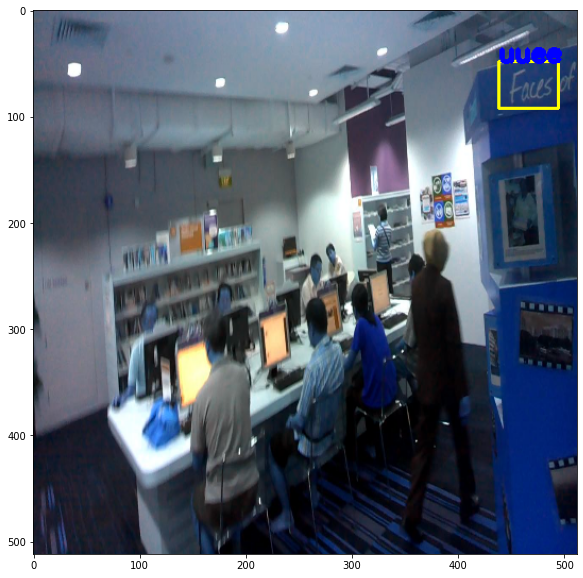

In [60]:
img=cv2.imread('/content/icdar2015/train_imgs/img_499.jpg')
im=inferencePipeline(img)
plt.figure(figsize=(20,10)) 
plt.imshow(im)

Time Taken By Pipeline=3.3551480770111084 seconds


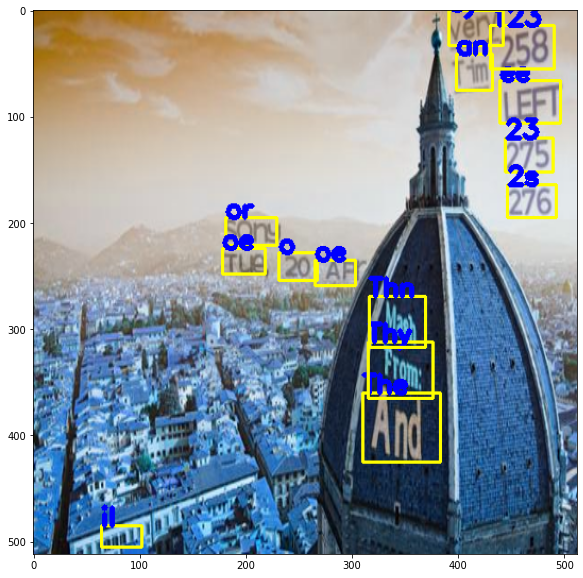

In [ ]:
img=cv2.imread('/content/drive/MyDrive/SynthText/111/monuments_53_9.jpg')
im=inferencePipeline(img)
plt.figure(figsize=(20,10)) 
plt.imshow(im)

Time Taken By Pipeline=4.6399619579315186 seconds


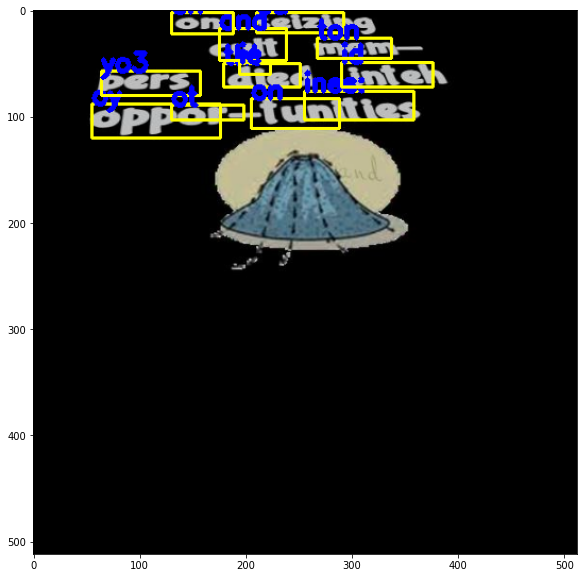

In [ ]:
img=cv2.imread('/content/drive/MyDrive/SynthText/1/ant+hill_100_75.jpg')
im=inferencePipeline(img)
plt.figure(figsize=(20,10)) 
plt.imshow(im)

Time Taken By Pipeline=0.5494658946990967 seconds


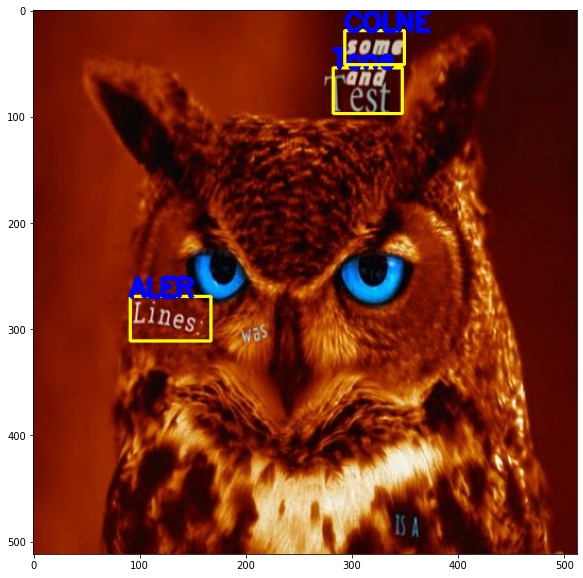

In [ ]:
img=cv2.imread('/content/drive/MyDrive/SynthText/118/night_140_3.jpg')
im=inferencePipeline(img)
plt.figure(figsize=(20,10)) 
plt.imshow(im)